In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.utils import shuffle

In [2]:
data=pd.read_csv('congress_voting.csv', header=0)
data.head(2)

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-adi,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,target
0,1,2,1,2,2,2,1,1,1,2,0,2,2,2,1,2,1
1,1,2,1,2,2,2,1,1,1,1,1,2,2,2,1,0,1


In [3]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value

In [4]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree ''' 
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            feature_values = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in feature_values:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.info_gain(parent) - (weight_l*self.info_gain(l_child) + weight_r*self.info_gain(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):
        ''' function to compute gini index '''
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
    def info_gain(self, y):
        ''' function to compute gini index '''
        
        class_labels = np.unique(y)
        gain = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gain-= p_cls*math.log2(p_cls)
        return gain
        
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        ''' function to predict new dataset '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)
    def calculate_accuracy(self,result,y_test):
        count=[1 if result[i]==y_test[i] else 0 for i in range(len(result)) ]
        return round(sum(count)/len(y_test),4)

In [5]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)

In [21]:
classifier = DecisionTreeClassifier(min_samples_split=2, max_depth=4)
classifier.fit(X_train,Y_train)
# classifier.print_tree()

In [22]:
Y_pred = classifier.predict(X_test) 
print(Y_pred)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

[0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1]


0.9195402298850575

In [23]:
# classifier.calculate_accuracy(Y_pred,Y_test)

0.9195

In [26]:
 Y_pred = classifier.predict(X_train) 
print(Y_pred)
from sklearn.metrics import accuracy_score
accuracy_score(Y_train, Y_pred)

[1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

0.985632183908046

In [82]:
#Calculate this hundred times on testing
test_result_set=[]
for i in range(100):
    data=shuffle(data, random_state=32)
    X = data.iloc[:, :-1].values
    Y = data.iloc[:, -1].values.reshape(-1,1)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25, random_state=41)
    classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=4)
    classifier.fit(X_train,Y_train)
    Y_pred = classifier.predict(X_test) 
#     classifier.print_tree()
    accuracy=classifier.calculate_accuracy(Y_pred,Y_test)
    test_result_set.append([i,accuracy])

print(test_result_set)

[[0, 0.9266], [1, 0.9358], [2, 0.9725], [3, 0.9633], [4, 0.9266], [5, 0.945], [6, 0.9358], [7, 0.9358], [8, 0.9725], [9, 0.945], [10, 0.9725], [11, 0.945], [12, 0.945], [13, 0.9817], [14, 0.9541], [15, 0.9633], [16, 0.9541], [17, 0.945], [18, 0.9541], [19, 0.945], [20, 0.9541], [21, 0.945], [22, 0.9266], [23, 0.9266], [24, 0.945], [25, 0.9633], [26, 0.9358], [27, 0.945], [28, 0.945], [29, 0.9174], [30, 0.9358], [31, 0.9266], [32, 0.8991], [33, 0.9541], [34, 0.9633], [35, 0.945], [36, 0.9541], [37, 0.9725], [38, 0.945], [39, 0.9541], [40, 0.9541], [41, 0.9174], [42, 0.945], [43, 0.9266], [44, 0.9358], [45, 0.9725], [46, 0.945], [47, 0.9633], [48, 0.945], [49, 0.9725], [50, 0.9541], [51, 0.9083], [52, 0.945], [53, 0.9358], [54, 0.9266], [55, 0.9358], [56, 0.9083], [57, 0.945], [58, 0.9633], [59, 0.9541], [60, 0.9358], [61, 0.9633], [62, 0.9541], [63, 0.9358], [64, 0.9633], [65, 0.9725], [66, 0.9266], [67, 0.945], [68, 0.9266], [69, 0.945], [70, 0.9083], [71, 0.9725], [72, 0.9266], [73, 0

In [83]:
#Calculate this hundred times on training
train_result_set=[]
for i in range(100):
    data=shuffle(data, random_state=32)
    X = data.iloc[:, :-1].values
    Y = data.iloc[:, -1].values.reshape(-1,1)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25, random_state=41)
    classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=4)
    classifier.fit(X_train,Y_train)
    Y_pred = classifier.predict(X_train) 
#     classifier.print_tree()
    accuracy=classifier.calculate_accuracy(Y_pred,Y_train)
    train_result_set.append([i,accuracy])
print(train_result_set)

[[0, 0.9785], [1, 0.9908], [2, 0.9877], [3, 0.9877], [4, 0.9908], [5, 0.9939], [6, 0.9877], [7, 0.9877], [8, 0.9908], [9, 0.9847], [10, 0.9908], [11, 0.9939], [12, 1.0], [13, 0.9939], [14, 0.9969], [15, 0.9908], [16, 0.9877], [17, 0.9939], [18, 0.9908], [19, 0.9908], [20, 0.9785], [21, 0.9816], [22, 0.9847], [23, 0.9969], [24, 0.9877], [25, 0.9816], [26, 0.9785], [27, 0.9724], [28, 0.9816], [29, 0.9847], [30, 0.9877], [31, 0.9785], [32, 0.9847], [33, 0.9847], [34, 0.9847], [35, 0.9939], [36, 0.9939], [37, 0.9877], [38, 0.9816], [39, 0.9939], [40, 0.9816], [41, 0.9908], [42, 0.9877], [43, 0.9908], [44, 0.9816], [45, 0.9908], [46, 0.9816], [47, 0.9847], [48, 0.9816], [49, 0.9877], [50, 0.9816], [51, 0.9847], [52, 0.9877], [53, 0.9877], [54, 0.9785], [55, 0.9816], [56, 0.9847], [57, 0.9785], [58, 0.9693], [59, 0.9877], [60, 0.9816], [61, 0.9785], [62, 0.9816], [63, 0.9939], [64, 0.9847], [65, 0.9939], [66, 0.9908], [67, 0.9969], [68, 0.9847], [69, 0.9939], [70, 0.9847], [71, 0.9816], [72,

std:  0.005829356739812712


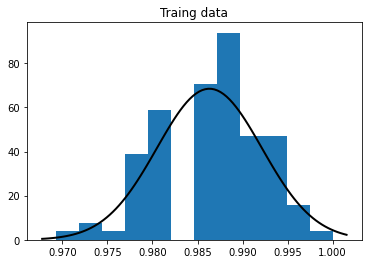

In [93]:
import matplotlib.pyplot as plt
from scipy.stats import norm
x = [i[1] for i in train_result_set]
mu, std = norm.fit(x) 
print("std: ",std)
# Plot the histogram.
plt.hist(x, bins=12, density=True)
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
plt.title("Traing data")
plt.show()
 

std:  0.019053540773305115


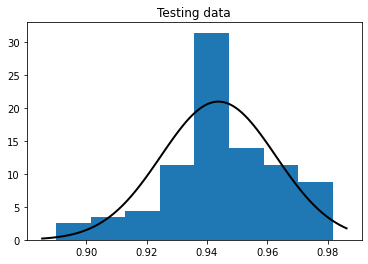

In [92]:
x = [i[1] for i in test_result_set]
mu, std = norm.fit(x) 
print("std: ",std)
# Plot the histogram.
plt.hist(x, bins=8, density=True)
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
plt.title("Testing data")
plt.show()